# Proyek Analisis Data: Bike Sharing.
- **Nama:** Merri Putri Cristina Sani Panggabean
- **Email:** merypanggabean219@gmail.com
- **ID Dicoding:** MC404D5X0047

## Menentukan Pertanyaan Bisnis

- Kapan Waktu dengan Permintaan Penyewaan Sepeda Tertinggi?
- Bagaimana cuaca (weather) mempengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# mememuat tools yang akan digunakan.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

- Memuat tabel **day.csv** dan **hour.csv**

In [ ]:
# memanggil dataset pada setiap tabel menggunakan *read.csv*
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

menampilkan data teratas pada tabel **day_df** dan **hour_df**.

In [ ]:
#menampilkan data teratas
print("\nmenampilkan datset day_df : \n", day_df.head())
print("\nmenampilkan datset hour_df : \n",hour_df.head())


menampilkan datset day_df : 
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  16

**Insight:**
- menggunakan perintah **pd.read_csv** untuk file **day.csv** untuk membaca file.
- **df.head()** menampilkan tabel teratas pada dataset **day_df**.
- begitu juga pada file **hour.csv**, menggunakan **pd.read.csv** untuk membaca file **hour.csv**.
- menggunakan perintah **df.head()** untuk menampilkan tabel teratas pada dataset **hour_df**.

### Assessing Data

- menilai dataset **day_df** dan **hour_df**

In [ ]:
# melihat missing value/type data pada setiap kolom dalam data day_df dan hour_df.
print ("\n Menampilkan Missing value pada day_df: \n",day_df.info())
print ("\n Menampilkan Missing value pada hour_df: \n",hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

 Menampilkan Missing value pada day_df: 
 None
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [ ]:
# melihat inaccurate value pada dataset pada day_df dan hour_df.
print("menampilkan inaccurate value pada day_df : \n",day_df.isnull().sum())
print("menampilkan inaccurate value pada hour_df : \n",hour_df.isnull().sum())

menampilkan inaccurate value pada day_df : 
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
menampilkan inaccurate value pada hour_df : 
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
# melihat statistik pada kedua dataset.
print("Tampilan Statistik day_df: ", day_df.describe())
print("Tampilan Statistik hour_df: ", hour_df.describe())

Tampilan Statistik day_df:                      dteday        temp       atemp         hum   windspeed  \
count                  731  731.000000  731.000000  731.000000  731.000000   
mean   2012-01-01 00:00:00   20.310776   23.717699   62.789406   12.762576   
min    2011-01-01 00:00:00    2.424346    3.953480    0.000000    1.500244   
25%    2011-07-02 12:00:00   13.820424   16.892125   52.000000    9.041650   
50%    2012-01-01 00:00:00   20.431653   24.336650   62.666700   12.125325   
75%    2012-07-01 12:00:00   26.872076   30.430100   73.020850   15.625371   
max    2012-12-31 00:00:00   35.328347   42.044800   97.250000   34.000021   
std                    NaN    7.505091    8.148059   14.242910    5.192357   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4

In [ ]:
#melihat duplikat data pada dataset day_df dan hour_df.
print("Jumlah duplikasi day_df: ", day_df.duplicated().sum())
print("Jumlah duplikasi hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi day_df:  0
Jumlah duplikasi hour_df:  0


**insight**
1. tabel **day_df** dan **hour_df**
  - pada coloumn **dteday** memiliki dtype **object**, akan dikonversi dengan dtype **datetime**.
  - menghapus kolom **instant** karena hanya berupa ID yang tidak perlu di analisis dan menghapus **workingday** karena sudah termasuk ke dalam coloumn **weekday**.
  - tidak ada missing value, Inaccurate value dan duplikat data pada setiap dataset.
  - pada coloumn **season, yr, mnth, holiday, weekday,weathersit** memiliki dtype **int**, maka akan dikonversi nilai numerik menjadi kategori.
  - melakukan konversi isi pada dataset kolom yang berupa type **category**, agar mudah dipahami oleh pengguna.

### Cleaning Data

membersihkan dataset pada tabel **day_df**.

In [ ]:
#mengubah dtype object menjadi datetime pada coloumn dteday.
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [ ]:
#menghapus coloumn instant
day_df.drop(columns=['instant'], inplace=True)

In [ ]:
#menghapus tabel workingday
day_df.drop(columns=['workingday'], inplace=True)

In [ ]:
# mengubah dtype pada kolom 'season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit' menjadi kategori.
int_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']

# Mengubah tipe data menjadi kategori
day_df[int_columns] = day_df[int_columns].astype('category')

In [ ]:
# konversi isi pada kolom season dan weathersit dengan menggunakan mapping.
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}

day_df['season'] = day_df['season'].map(season_mapping)

day_df['weathersit'] = day_df['weathersit'].map(weather_mapping)

In [ ]:
# mengkonversi kolom yr menjadi kategori pada day_df.

# kolom yr
day_df['yr'] = day_df['yr'].map({0: '2011', 1: '2012'})
# kolom mnth
day_df['mnth'] = day_df['mnth'].map({i: month for i, month in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                                         'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 1)})
# kolom holiday
day_df['holiday'] = day_df['holiday'].map({0: 'No', 1: 'Yes'})

# kolom weekday
day_df['weekday'] = day_df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
                                           3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})



In [ ]:
# mengubah coloum **temp, atemp, hum,windspeed** kedalam skala data ke satuan yang lebih umum sesuai readme.
day_df["temp"] = day_df["temp"] * 41
day_df["atemp"] = day_df["atemp"] * 50
day_df["hum"] = day_df["hum"] * 100
day_df["windspeed"] = day_df["windspeed"] * 67
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Winter,2011,Jan,No,Sunday,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Winter,2011,Jan,No,Monday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Winter,2011,Jan,No,Tuesday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Winter,2011,Jan,No,Wednesday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


membersihkan tabel **hour_df**

In [ ]:
# mengubah dtype object menjadi datetime pada coloumn dteday.
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [ ]:
# menghapus coloumn instant
hour_df.drop(columns=['instant'], inplace=True)

In [ ]:
# menghapus workingday pada tabel hour_df.
hour_df.drop(columns=['workingday'], inplace=True)

In [ ]:
# mengubah dtype pada kolom 'season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit' menjadi kategori.
int_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']

# Mengubah tipe data menjadi kategori
hour_df[int_columns] = hour_df[int_columns].astype('category')

In [ ]:
# konversi isi pada kolom season dan weathersit dengan menggunakan mapping.
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}

hour_df['season'] = hour_df['season'].map(season_mapping)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_mapping)

In [ ]:
# mengkonversi kolom yr menjadi kategori pada hour_df.

# kolom yr
hour_df['yr'] = hour_df['yr'].map({0: '2011', 1: '2012'})
# kolom mnth
hour_df['mnth'] = hour_df['mnth'].map({i: month for i, month in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                                         'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 1)})
# kolom holiday
hour_df['holiday'] = hour_df['holiday'].map({0: 'No', 1: 'Yes'})

# kolom weekday
hour_df['weekday'] = hour_df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
                                           3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

In [ ]:
# mengubah isi data numerik menjadi str pada kolom hr
hour_df['hr'] = pd.cut(
    hour_df['hr'],
    bins=[0, 4, 8, 12, 16, 20, 24],
    labels=['Midnight', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night'],
    right=False
).astype(str)  # Mengubah tipe data ke string agar mudah digunakan


In [ ]:
# mengubah kolom temp,atemp,hum dan windspeed pada dataset hour sesuai data pada readme.
hour_df["temp"] = hour_df["temp"] * 41
hour_df["atemp"] = hour_df["atemp"] * 50
hour_df["hum"] = hour_df["hum"] * 100
hour_df["windspeed"] = hour_df["windspeed"] * 67

In [ ]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,2011,Jan,Midnight,No,Saturday,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Winter,2011,Jan,Midnight,No,Saturday,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Winter,2011,Jan,Midnight,No,Saturday,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Winter,2011,Jan,Midnight,No,Saturday,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Winter,2011,Jan,Early Morning,No,Saturday,Clear,9.84,14.395,75.0,0.0,0,1,1


**Insight:**
- kolom instant dan workingday telah dihapus.
- telah mengisi dataset yang mudah dipahami.
- mengganti typedata int pada season,yr,mnth,holiday,weekday dan weathersit menjadi typedate category.
- mengubah typedate pada dteday menjadi datetime.
- konversi isi kolom hr menjadi string.
- mengubah kolom temp,atemp,hum dan windspeed sesuai parameter dalam readme.

## Exploratory Data Analysis (EDA)

### Explore tabel_df dan hour_df

Explore Tabel **day_df**

In [ ]:
# melihat sample pada dataset pada day_df.
day_df.sample(5)

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
40,2011-02-10,Winter,2011,Feb,No,Thursday,Clear,5.918268,7.47740,43.7391,14.869645,47,1491,1538
112,2011-04-23,Spring,2011,Apr,No,Saturday,Mist,18.860000,22.50605,88.7917,15.458575,1462,2574,4036
57,2011-02-27,Winter,2011,Feb,No,Sunday,Clear,14.082598,17.55545,68.0000,8.391616,694,1708,2402
705,2012-12-06,Fall,2012,Dec,No,Thursday,Clear,10.489153,12.91020,50.8750,11.708518,340,5035,5375
164,2011-06-14,Spring,2011,Jun,No,Tuesday,Clear,24.770847,29.57730,50.7083,18.041961,727,4164,4891


In [ ]:
# melihat median,range dll pada dataset day_df
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Summer,2012,Jan,No,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# melihat dataset penyewaan sepeda berdasarkan musim pada day_df.
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False).head(10)

<ipython-input-25-08ef560e8423>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False).head(10)


,cnt
season,
Summer,188
Spring,182
Winter,179
Fall,176


In [ ]:
#melihat penyewaan sepeda berdasarkan hari pada day_df.
day_df.groupby(by="mnth").cnt.nunique().sort_values(ascending=False).head(10)

<ipython-input-48-c5c0ddfb299f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="mnth").cnt.nunique().sort_values(ascending=False).head(10)


,cnt
mnth,
Jan,62
May,62
Jul,62
Aug,62
Oct,62
Dec,62
Mar,60
Apr,60
Jun,60


explore tabel **hour_df**

In [ ]:
# menampilkan sample teratas pada dataset hour_df.
hour_df.sample(5)

,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6393,2011-09-28,Fall,2011,Sep,Night,No,Wednesday,Clear,24.60,25.760,94.0,8.9981,12,59,71
1930,2011-03-26,Spring,2011,Mar,Early Morning,No,Saturday,Clear,8.20,9.850,51.0,12.9980,0,8,8
4592,2011-07-15,Summer,2011,Jul,Early Morning,No,Friday,Mist,24.60,29.545,73.0,7.0015,12,108,120
8848,2012-01-09,Winter,2012,Jan,Afternoon,No,Monday,Mist,10.66,13.635,56.0,7.0015,10,93,103
2093,2011-04-02,Spring,2011,Apr,Midnight,No,Saturday,Clear,9.84,12.120,75.0,8.9981,1,20,21


In [ ]:
# melihat range,median dll pada dataset pada hour_df.
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379,17379,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,6,2,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Summer,2012,May,Evening,No,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,2916,16879,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


<Axes: >

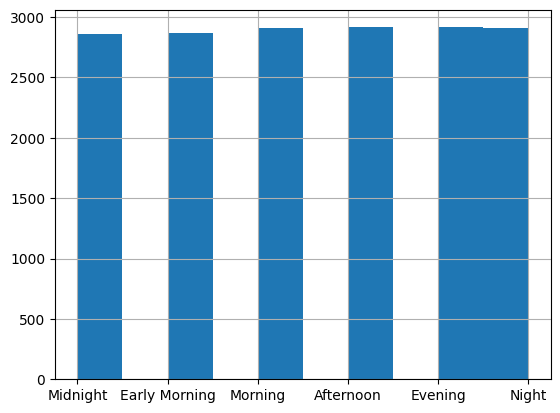

In [ ]:
# menampilkan history penyewaan sepeda berdasarkan jam pada hour_df.
hour_df.hr.hist()

In [ ]:
#melihat penyewaan sepeda berdasarkan tahun pada hour_df.
hour_df.groupby("yr")["cnt"].mean()

<ipython-input-30-d1aa87e981dd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby("yr")["cnt"].mean()


,cnt
yr,
2011,143.794448
2012,234.666361


In [ ]:
# melihat penyewaan sepeda berdasarkan hari pada hour_df.
hour_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False).head(10)

<ipython-input-31-afac0f0637a0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False).head(10)


,cnt
weekday,
Wednesday,616
Saturday,609
Thursday,606
Tuesday,598
Monday,595
Friday,584
Sunday,571


# menggabungkan semua data

menggabungkan semua dataset.

In [ ]:
# menggabungkan data, agar mudah di analisis pada EDA .
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    on="dteday"  # Menggabungkan berdasarkan tanggal
)
all_df.head()

,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,weathersit_x,temp_x,atemp_x,hum_x,...,holiday_y,weekday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,2011-01-01,Winter,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,...,No,Saturday,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Winter,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,...,No,Saturday,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Winter,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,...,No,Saturday,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Winter,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,...,No,Saturday,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Winter,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,...,No,Saturday,Clear,9.84,14.395,75.0,0.0,0,1,1


**Insight:**
- melihat 5 sample teratas pada setiap dataset.
- melihat semua data pada setiap dataset menggunakan **describe(include="all")**.
- jika melihat penyewaan sepeda berdasarkan musim. maka penyewaan tertinggi terjadi di musim panas (Summer) dan terendah di musim dingin (Winter).
- berdasarkan hari, penyewaan sepeda tertinggi terjadi di hari Wednesday dan terendah di hari sunday.
- berdasarkan tahun, penyewaan sepeda tertinggi terjadi di tahun 2011 daripada di tahun 2012 mengalami penyewaan sepeda terendah.
- pada history, menunjukkan hampir sama penyewaan sepede berdasarkan jam.
- berdasarkan bulan, mengalami peningkatan dari bulan juni-september dan penurunan di bulan november-desember.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan Waktu dengan Permintaan Penyewaan Sepeda Tertinggi?

In [ ]:
all_df.sample(5)

,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,weathersit_x,temp_x,atemp_x,hum_x,...,holiday_y,weekday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
8255,2011-12-15,Fall,2011,Dec,No,Thursday,Mist,17.322500,20.61185,63.4167,...,No,Thursday,Light Rain,21.32,25.000,55.0,15.0013,6,76,82
14237,2012-08-21,Summer,2012,Aug,No,Tuesday,Clear,26.615847,30.05125,67.3750,...,No,Tuesday,Clear,27.06,31.060,61.0,7.0015,58,120,178
10472,2012-03-17,Winter,2012,Mar,No,Saturday,Mist,21.080847,25.25230,75.5833,...,No,Saturday,Mist,21.32,25.000,77.0,8.9981,226,359,585
2862,2011-05-04,Spring,2011,May,No,Wednesday,Mist,16.980847,20.23250,73.7083,...,No,Wednesday,Light Rain,15.58,19.695,94.0,22.0028,1,2,3
227,2011-01-10,Winter,2011,Jan,No,Monday,Clear,6.184153,7.54440,48.2917,...,No,Monday,Clear,8.20,9.850,40.0,15.0013,1,154,155


<ipython-input-60-558eddec45a5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_yearly = all_df.groupby("season_y")[["cnt_y"]].sum().reset_index()


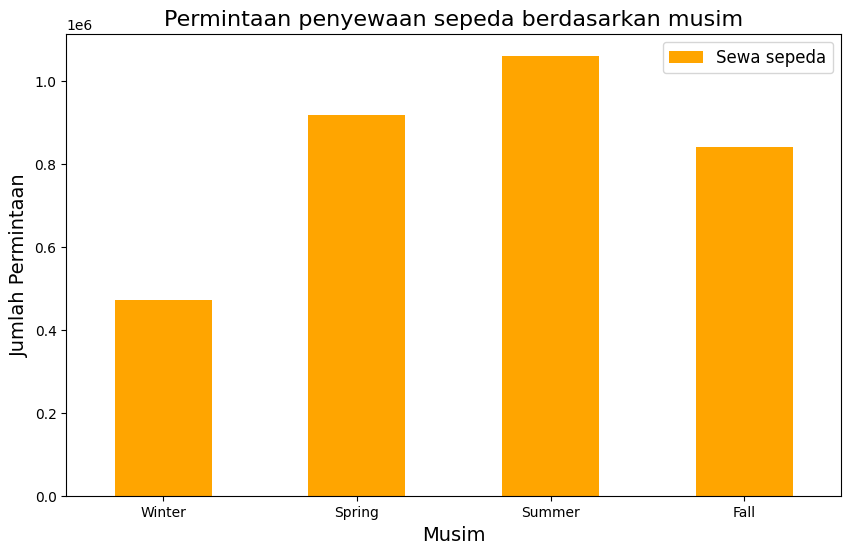

In [ ]:
# menampilkan permintaan penyewaan sepeda berdasarkan bulan.
# Mengelompokkan data berdasarkan bulan
df_yearly = all_df.groupby("season_y")[["cnt_y"]].sum().reset_index()

# Membuat bar chart untuk membandingkan jumlah penyewa registered vs casual per tahun
fig, ax = plt.subplots(figsize=(10, 6))
df_yearly.set_index("season_y").plot(kind="bar", stacked=True, ax=ax, color=["orange"])
ax.set_xlabel("Musim", fontsize=14)
ax.set_ylabel("Jumlah Permintaan", fontsize=14)
ax.set_title("Permintaan penyewaan sepeda berdasarkan musim", fontsize=16)
ax.legend(["Sewa sepeda"], fontsize=12)
plt.xticks(rotation=0)
plt.show()

<ipython-input-56-24cbd20b36eb>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_yearly = all_df.groupby("mnth_y")[["cnt_y"]].sum().reset_index()


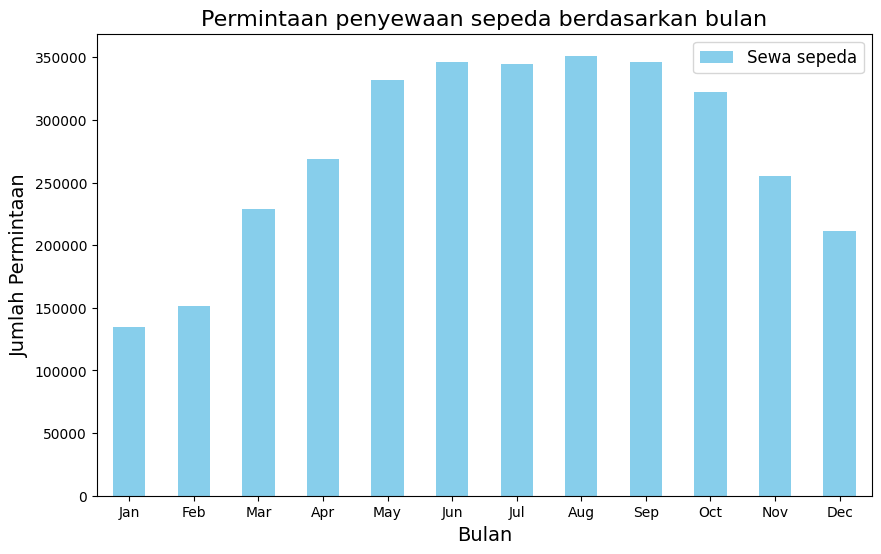

In [ ]:
# menampilkan permintaan penyewaan sepeda berdasarkan bulan.
# Mengelompokkan data berdasarkan bulan
df_yearly = all_df.groupby("mnth_y")[["cnt_y"]].sum().reset_index()

# Membuat bar chart untuk membandingkan jumlah penyewa registered vs casual per tahun
fig, ax = plt.subplots(figsize=(10, 6))
df_yearly.set_index("mnth_y").plot(kind="bar", stacked=True, ax=ax, color=["skyblue"])
ax.set_xlabel("Bulan", fontsize=14)
ax.set_ylabel("Jumlah Permintaan", fontsize=14)
ax.set_title("Permintaan penyewaan sepeda berdasarkan bulan", fontsize=16)
ax.legend(["Sewa sepeda"], fontsize=12)
plt.xticks(rotation=0)
plt.show()

- berdasarkan Hari **Weekday**

<ipython-input-61-ca23a788bfde>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


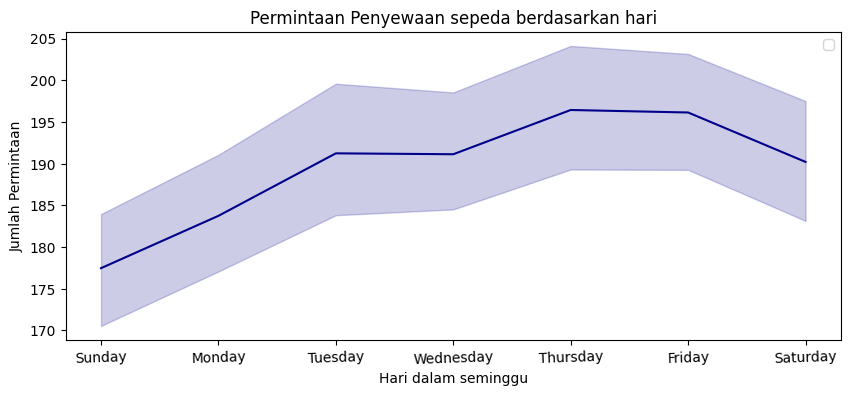

In [ ]:
# melihat permintaan penyewaan sepeda berdasarkan hari.
plt.figure(figsize=(10, 4))
sns.lineplot(data=all_df, x="weekday_y", y="cnt_y", color="darkblue")
plt.xticks(rotation=2)
plt.title("Permintaan Penyewaan sepeda berdasarkan hari")
plt.xlabel("Hari dalam seminggu")
plt.ylabel("Jumlah Permintaan")
plt.legend()
plt.show()


### Pertanyaan 2: Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?

<ipython-input-139-555c7362dc39>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


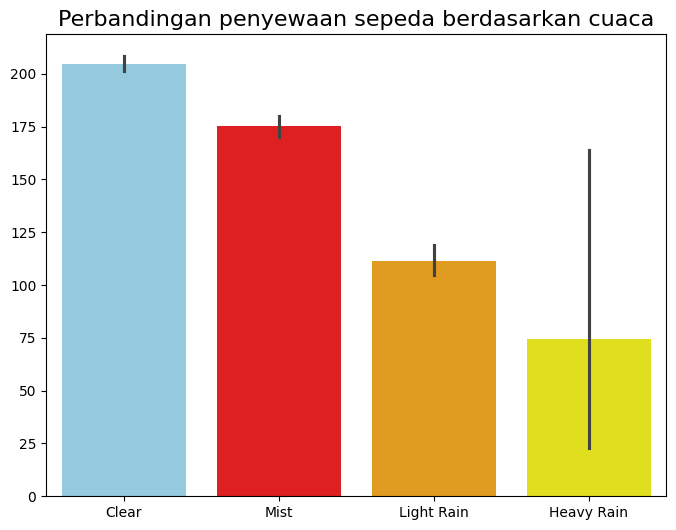

In [ ]:
# melihat penyewaan sepeda berdasarkan cuaca.
# mengatur warna
colors = ["skyblue", "red", "orange", "yellow"]

# membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(8, 6))

# Buat barplot untuk y="cnt" dan x="weathersit"
sns.barplot(
        y="cnt_y",
        x="weathersit_y",
        data=all_df.sort_values(by="weathersit_y", ascending=False),
        palette=colors,
        ax=ax
    )
# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Perbandingan penyewaan sepeda berdasarkan cuaca", loc="center", fontsize=16)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# menampilkan plot
plt.show()

**Insight:**
- permintaan sewa sepeda berdasarkan bulan yang paling tertinggi dibulan juni - september dan yang terendah berada dibulan november-desember.
- jika berdasarkan hari, permintaan sewa sepeda yang tertinggi terjadi di hari kamis-jumat dan yang terendah terjadi di hari minggu.
- jika berdasarkan musim, maka sewa sepeda meningkat di musim summer dan terendah berada di musim winter.
- penyewaan sepeda yang paling banyak berdasarkan cuaca ialah clear dan penyewaan sepeda terendah ialah heavy rain/snow.

## Analisis Lanjutan (Opsional)

# RFM analiysis

In [ ]:
# Menentukan tanggal referensi (misal, hari terakhir dalam dataset)
reference_date = all_df["dteday"].max()

# RFM Calculation
rfm_df = all_df.groupby("dteday").agg({
    "dteday": "max",  # Mengambil tanggal terakhir transaksi
    "cnt_y": ["count", "sum"]  # Frequency & Monetary (Total Peminjaman Sepeda)
}).reset_index(drop=True)
rfm_df.columns = ["max_order_timestamp", "frequency", "monetary"]
rfm_df["recency"] = (reference_date - rfm_df["max_order_timestamp"]).dt.days
print(rfm_df.head())

  max_order_timestamp  frequency  monetary  recency
0          2011-01-01         24       985      730
1          2011-01-02         23       801      729
2          2011-01-03         22      1349      728
3          2011-01-04         23      1562      727
4          2011-01-05         23      1600      726


In [ ]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,max_order_timestamp,frequency,monetary,recency
730,2012-12-31,24,2729,0
729,2012-12-30,24,1796,1
728,2012-12-29,24,1341,2
727,2012-12-28,24,3095,3
726,2012-12-27,24,2114,4


In [ ]:
# melihat RFM pada dataset mengambil kolom dteday sebagai tanggal transaksi terakhir
# dan juga mengambil kolom season untuk melihat penyewaan sepeda berdasarkan musim pada RFM analisis.
all_df = pd.concat([day_df, hour_df], ignore_index=True)

# melakukan recency
latest_date = all_df["dteday"].max().date()  # Tanggal terakhir dalam dataset
recency_df = all_df.groupby("season_y", observed=True).agg({"dteday": "max"}).reset_index()
recency_df["max_order_timestamp"] = recency_df["dteday"].dt.date
recency_df["recency"] = recency_df["max_order_timestamp"].apply(lambda x: (latest_date - x).days)
recency_df.drop(columns=["dteday"], inplace=True)
# melakukan frequency
frequency_df = all_df.groupby("season_y", observed=True).agg({"dteday": "count"}).reset_index()
frequency_df.rename(columns={"dteday": "frequency"}, inplace=True)
# melakukan monetary.
monetary_df = all_df.groupby("season_y", observed=True).agg({"cnt": "sum"}).reset_index()
monetary_df.rename(columns={"cnt": "monetary"}, inplace=True)

rfm_df = recency_df.merge(frequency_df, on="season_y").merge(monetary_df, on="season")
print(rfm_df.head())

   season max_order_timestamp  recency  frequency  monetary
0    Fall          2012-09-22      100       4684   2122258
1  Spring          2012-12-31        0       4423    942696
2  Summer          2012-06-20      194       4593   1837178
3  Winter          2012-12-20       11       4410   1683226


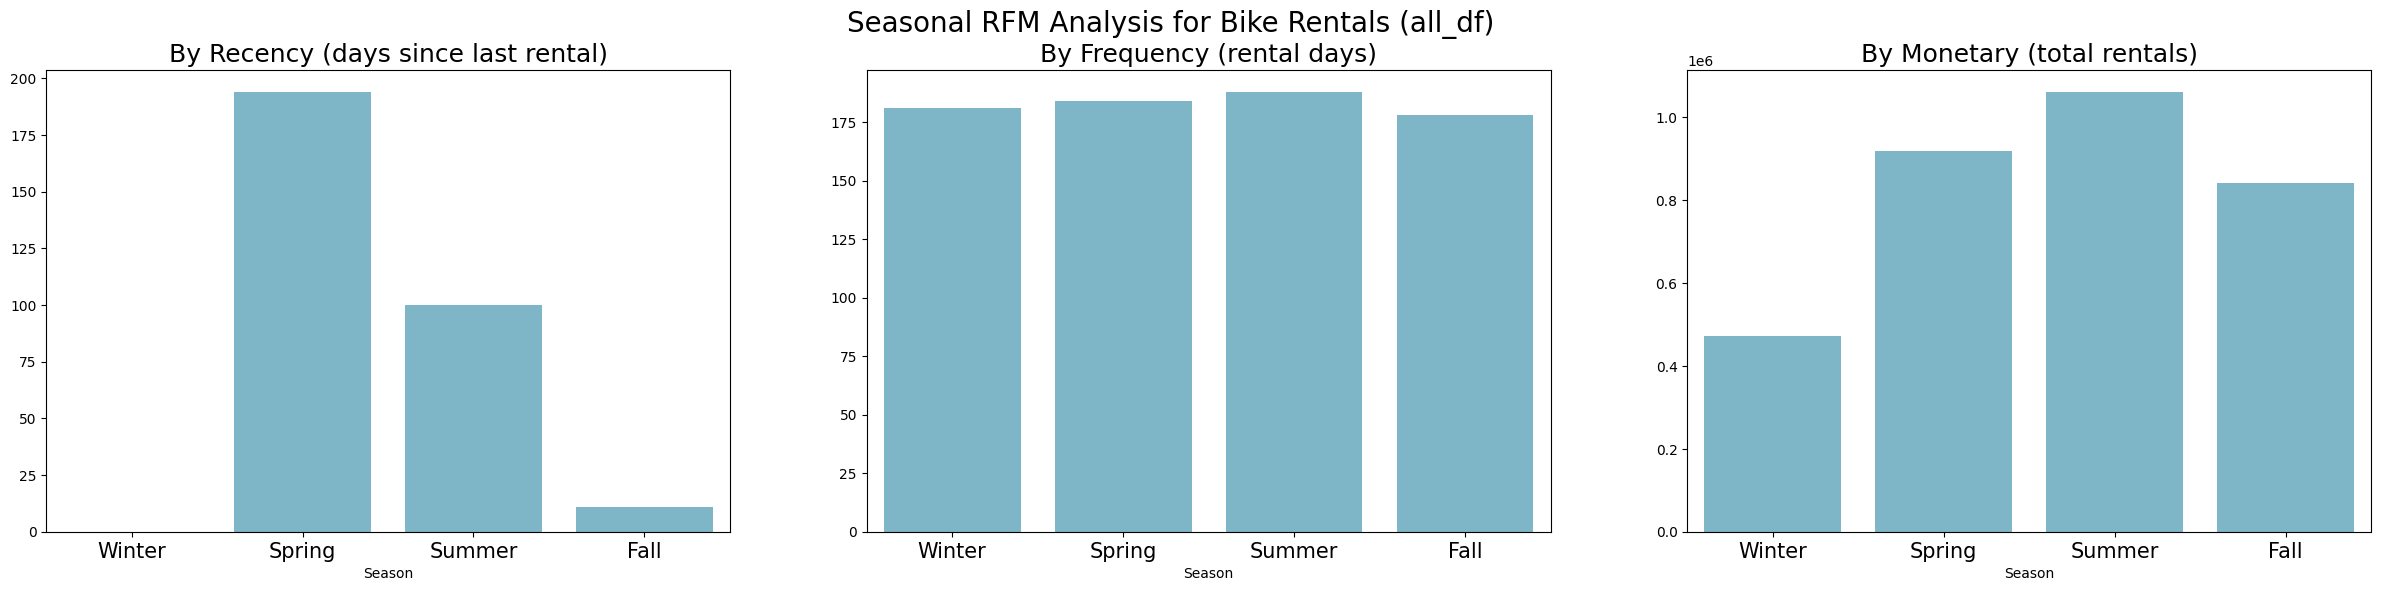

In [ ]:
# melihat bloxpot penyewaan sepeda dengan tanggal terakhir berdasarkan musim.

### RECENCY: Tanggal terakhir penyewaan per musim
recency = all_df.groupby("season_y", observed=False)["dteday"].max().reset_index()
recency["recency_days"] = (recency["dteday"].max() - recency["dteday"]).dt.days  # Hitung hari sejak terakhir sewa
recency = recency.drop(columns=["dteday"])

### FREQUENCY: Jumlah hari unik penyewaan per musim
frequency = all_df.groupby("season_y", observed=False)["dteday"].nunique().reset_index()
frequency.columns = ["season_y", "rental_days"]

### MONETARY: Total penyewaan sepeda per musim
monetary = all_df.groupby("season_y", observed=False)["cnt_y"].sum().reset_index()
monetary.columns = ["season_y", "total_rentals"]

# Gabungkan hasil RFM
rfm_df = recency.merge(frequency, on="season_y").merge(monetary, on="season_y")

# Buat visualisasi menggunakan matplotlib dan seaborn
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Recency Plot
sns.barplot(y="recency_days", x="season_y", hue="season_y", data=rfm_df.sort_values(by="recency_days", ascending=True), palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Season")
ax[0].set_title("By Recency (days since last rental)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Frequency Plot
sns.barplot(y="rental_days", x="season_y", hue="season_y", data=rfm_df.sort_values(by="rental_days", ascending=False), palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Season")
ax[1].set_title("By Frequency (rental days)", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Monetary Plot
sns.barplot(y="total_rentals", x="season_y", hue="season_y", data=rfm_df.sort_values(by="total_rentals", ascending=False), palette=colors, ax=ax[2], legend=False)
ax[2].set_ylabel(None)
ax[2].set_xlabel("Season")
ax[2].set_title("By Monetary (total rentals)", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Seasonal RFM Analysis for Bike Rentals (all_df)", fontsize=20)
plt.show()

## Clustering Analisis

disini saya menggunakan clustering analisis untuk analisis dataset day_df dan hour_df.

**total penyewa sepeda berdasarkan musim**.

In [ ]:
# Contoh: Mengelompokkan total penyewaan sepeda berdasarkan musim
sorted_season_usage = all_df.groupby("season_y")["cnt_y"].sum().reset_index()

# Mengurutkan berdasarkan jumlah penyewaan sepeda
sorted_season_usage = sorted_season_usage.sort_values(by="cnt_y", ascending=False)

# Mapping season agar lebih mudah dibaca
sorted_season_usage["season_y"] = sorted_season_usage["season_y"].replace(season_mapping)

# Menampilkan hasil
print(sorted_season_usage)

  season_y    cnt_y
2   Summer  1061129
1   Spring   918589
3     Fall   841613
0   Winter   471348


<ipython-input-148-6a61be22b9cd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sorted_season_usage = all_df.groupby("season_y")["cnt_y"].sum().reset_index()


**total penyewa sepeda berdasarkan tahun**

In [ ]:
# menghitung total penyewa sepeda berdasarkan tahun
total_rentals_by_year = all_df.groupby("yr_y")["cnt_y"].sum().reset_index()
print(total_rentals_by_year)


   yr_y    cnt_y
0  2011  1243103
1  2012  2049576


<ipython-input-151-8c3a3dea4e19>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_rentals_by_year = all_df.groupby("yr_y")["cnt_y"].sum().reset_index()


## Conclusion
 pertanyaan 1 : Kapan Waktu dengan Permintaan Penyewaan Sepeda Tertinggi?
- dari kesimpulan pada pertanyaan ialah, Berdasarkan analisis data, permintaan penyewaan sepeda mengalami **peningkatan tertinggi pada bulan Juni hingga September**, yang merupakan **musim summer (musim panas)**. Pada periode ini, cuaca umumnya lebih hangat dan kondusif untuk aktivitas luar ruangan, sehingga mendorong lebih banyak orang untuk menggunakan sepeda.
Jika dilihat **berdasarkan hari dalam seminggu**, tingkat penyewaan sepeda cenderung meningkat **pada hari Kamis dan Jumat**. Hal ini kemungkinan besar disebabkan oleh meningkatnya aktivitas pengguna menjelang akhir pekan, seperti perjalanan menuju tempat kerja atau kegiatan rekreasi ringan.
Sebaliknya, **permintaan penyewaan sepeda menurun pada bulan November hingga Desember**, yang masuk dalam **musim winter (musim dingin)**. Pada periode ini, suhu lebih rendah, dan kondisi cuaca yang kurang mendukung, seperti hujan atau salju, membuat pengguna lebih memilih moda transportasi lain. Jika dilihat berdasarkan hari, **penurunan tertinggi terjadi pada hari Sabtu dan Minggu**, kemungkinan karena banyak pengguna lebih memilih untuk tetap berada di dalam ruangan atau menggunakan kendaraan pribadi dibandingkan bersepeda di tengah cuaca dingin.

pertanyaan 2 : Bagaimana cuaca (weather) mempengaruhi jumlah penyewaan sepeda?
- kesimpulannya ialah Cuaca memiliki dampak yang sangat signifikan terhadap pola penyewaan sepeda. Berdasarkan data yang dianalisis, jumlah penyewaan sepeda **meningkat secara signifikan saat cuaca dalam kondisi clear (cerah)**. Pada hari-hari dengan cuaca cerah, orang lebih cenderung beraktivitas di luar ruangan, baik untuk keperluan transportasi maupun rekreasi, sehingga permintaan sepeda pun ikut meningkat.
Sebaliknya, penyewaan sepeda mengalami **penurunan drastis saat cuaca dalam kondisi heavy rain (hujan lebat)**. Cuaca ekstrem seperti hujan deras atau salju membuat perjalanan menggunakan sepeda menjadi kurang nyaman dan lebih berisiko, sehingga Pengguna lebih memilih transportasi lain yang lebih aman dan terlindungi dari kondisi cuaca buruk.